In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['station', 'measurement']

In [12]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
#View column names for Measurement
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#View column names for Station
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

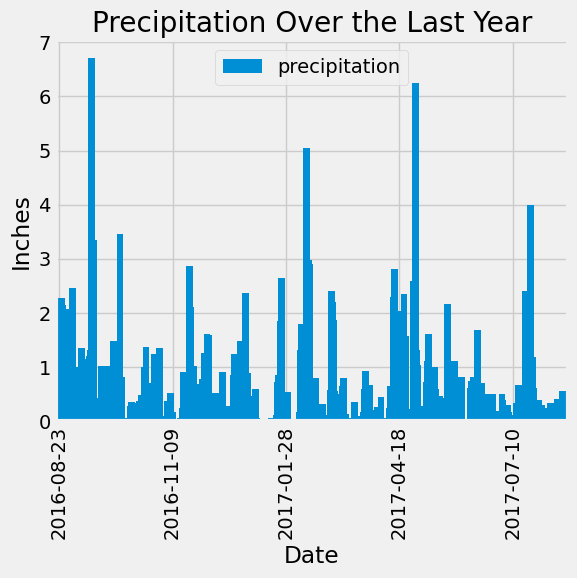

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores (columns = date and prcp)
sel = [Measurement.date, Measurement.prcp]
year_preciptation = session.query(*sel).\
    filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(year_preciptation, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot.bar(x='date', y='precipitation', figsize=(6, 6), width=30)

ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.set_title("Precipitation Over the Last Year")
ax.legend(loc='upper center')

ax.set_xticks(ax.get_xticks()[::500]) 
plt.xticks()

ax.yaxis.grid(True)

plt.tight_layout()  
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['precipitation'].describe()

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Measurement.station.distinct())).all()
total_stations

[(9,)]

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in active_stations:
    print(f"{station}, {count}")

USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == "USC00519281").all()

most_active_station_data

[(54.0, 85.0, 71.66378066378067)]

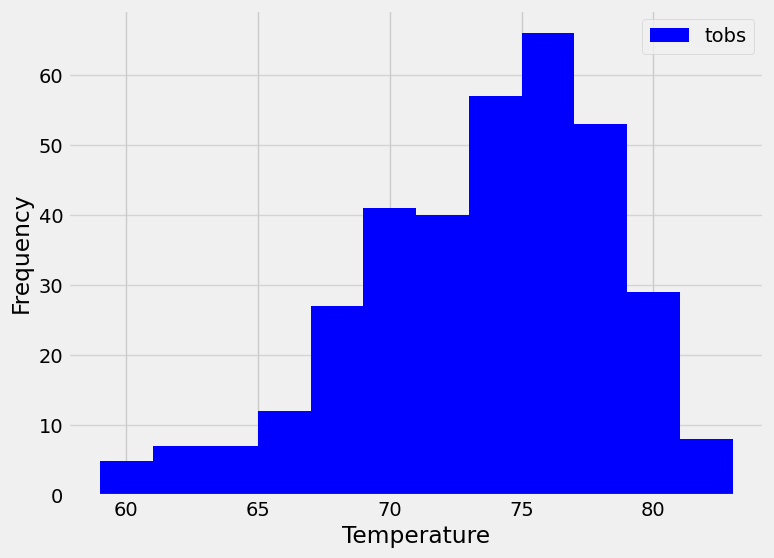

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, Measurement.tobs]
year_temp_data_USC00519281 = session.query(*sel).\
    filter(Measurement.date >= last_year,
           Measurement.station == 'USC00519281').all()

#Create a DataFrame to save the data before plotting
USC00519281_temp_df = pd.DataFrame(year_temp_data_USC00519281, columns=['date', 'temp'])

#Plot a histogram of last year's temp data from station: USC00519281
plt.figure(figsize=(8, 6)) 
plt.hist(USC00519281_temp_df['temp'], color= 'blue', bins=12, label='tobs')  
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

plt.show() 

# Close Session

In [24]:
# Close Session
session.close()